In [2]:
!pip install tensorflow
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install imageio
!pip install pydot

### Part1: Checking the dataset

In [3]:
from pathlib import Path
import imghdr
import os

data_dir = "hair_types"
image_extensions = [".png", ".jpg", ".gif", ".jpeg"] # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath) 

C:\Users\User\AppData\Local\Temp\ipykernel_11172\2752517551.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


### Preprocessing - Duplicate image

#### Duplicates in curly folder

In [4]:
import hashlib
from  imageio import imread
import matplotlib.pyplot as plt
%matplotlib inline
import time
import numpy as np

def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

In [5]:
os.chdir(r'C:\Users\User\Machine Learning\Lab3\hair_types\Curly_Hair')
files_list_curly = os.listdir()
print(len(files_list_curly))

343


In [6]:
import hashlib, os
duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))
            print(f"{filename} is a duplicate and will be removed")

In [7]:
duplicates

[]

In [8]:
for file_indexes in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(imread(files_list_curly[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(files_list_curly[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

#### Deleting Duplicates in curly folder

In [9]:
for index in duplicates:
    os.remove(files_list_curly[index[0]])

#### Duplicates in Straight hair

In [10]:
os.chdir(r'C:\Users\User\Machine Learning\Lab3\hair_types\Straight_Hair')
os.getcwd()

'C:\\Users\\User\\Machine Learning\\Lab3\\hair_types\\Straight_Hair'

In [11]:
files_list_straight = os.listdir()
print(len(files_list_straight))

328


In [12]:
import hashlib, os
duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))
            print(f"{filename} is a duplicate and will be removed")

In [13]:
duplicates

[]

In [14]:
for file_indexes in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(imread(files_list_straight[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(files_list_straight[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

#### Deleting Duplicates in Straight folder

In [15]:
for index in duplicates:
    os.remove(files_list_straight[index[0]])

#### Duplicates in Wavy hair

In [16]:
os.chdir(r'C:\Users\User\Machine Learning\Lab3\hair_types\Wavy_Hair')
os.getcwd()

'C:\\Users\\User\\Machine Learning\\Lab3\\hair_types\\Wavy_Hair'

In [17]:
files_list_wavy = os.listdir()
print(len(files_list_wavy))

301


In [18]:
import hashlib, os
duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))
            print(f"{filename} is a duplicate and will be removed")

In [19]:
duplicates

[]

In [20]:
for file_indexes in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(imread(files_list_wavy[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(files_list_wavy[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

#### Deleting Duplicates in Wavy folder

In [21]:
for index in duplicates:
    os.remove(files_list_wavy[index[0]])

### Part2: Using a DataLoader for Loading the Data

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

image_size = (64, 64)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\User\Machine Learning\Lab3\hair_types',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='categorical',
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\User\Machine Learning\Lab3\hair_types',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size, 
    labels='inferred',
    label_mode='categorical',
)

val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 969 files belonging to 3 classes.
Using 776 files for training.
Found 969 files belonging to 3 classes.
Using 193 files for validation.


### Part3: Visualizing the data

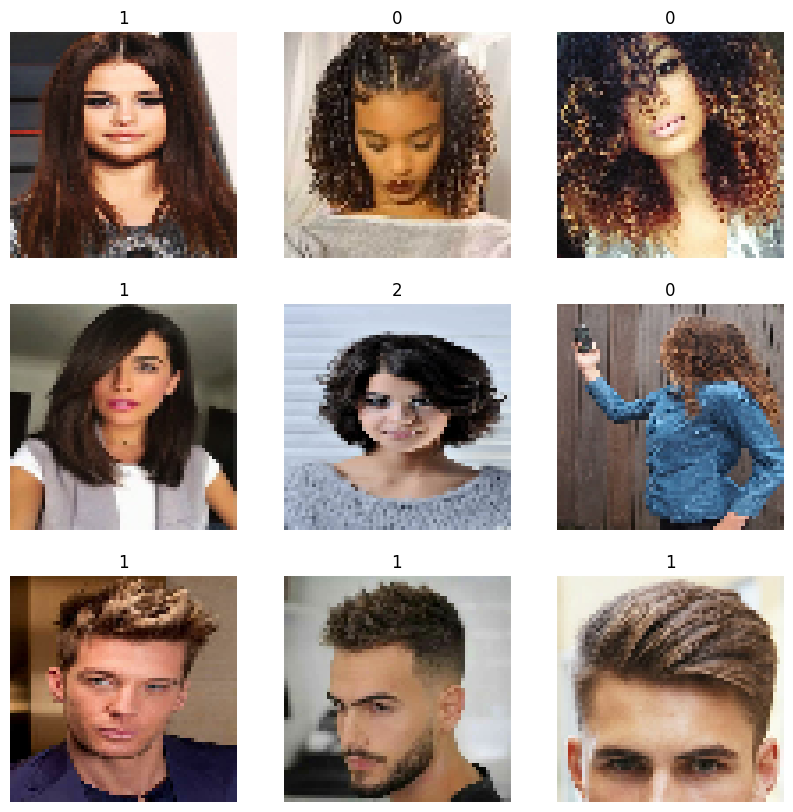

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(np.argmax(labels[i])))
        plt.axis("off")
plt.show()

### Part4: Sample Model

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(keras.Input(shape=image_size + (3,))) # 64, 64, 3
model.add(layers.Rescaling(1.0 / 255))

model.add(layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=64, kernel_size=5, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=128, kernel_size=5, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=256, kernel_size=5, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(3))
model.add(layers.Activation("softmax"))

epochs = 50

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3448 - loss: 1.0999 - val_accuracy: 0.3212 - val_loss: 1.2873
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3625 - loss: 1.1262 - val_accuracy: 0.3212 - val_loss: 1.0988
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3672 - loss: 1.0977 - val_accuracy: 0.3212 - val_loss: 1.0979
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3523 - loss: 1.0992 - val_accuracy: 0.3212 - val_loss: 1.0960
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3643 - loss: 1.0837 - val_accuracy: 0.3212 - val_loss: 1.3019
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3918 - loss: 1.1084 - val_accuracy: 0.4093 - val_loss: 1.0916
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4367 - loss: 1.0807 - val_accuracy: 0.3575 - val_loss: 1.0931
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4410 - loss: 1.0405 - val_accuracy: 0.4456 - val_loss:

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 56, 56, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 48, 48, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 48, 48, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,292,139 (12.56 MB)

 Trainable params: 1,097,379 (4.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,194,760 (8.37 MB)

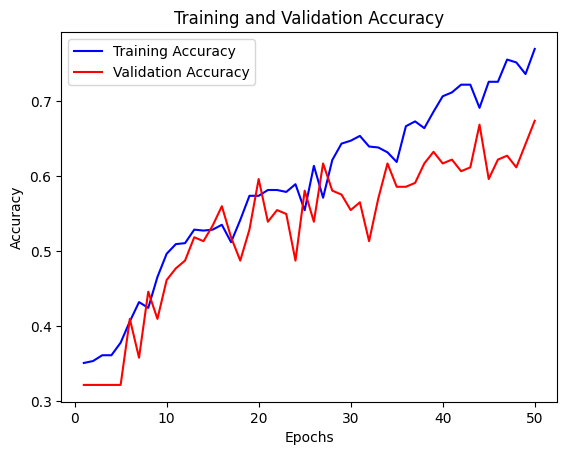

In [28]:
# Extract accuracy values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plotting accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

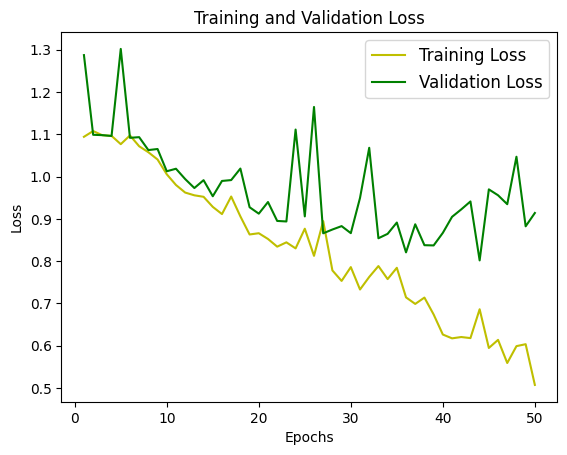

In [29]:
# Extract accuracy values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting accuracy
plt.plot(epochs, train_loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right', fontsize='large')
plt.show()


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Get the training metrics of the last epoch
train_acc_last_epoch = history.history['accuracy'][-1]
train_loss_last_epoch = history.history['loss'][-1]

val_acc_last_epoch = history.history['val_accuracy'][-1]
val_loss_last_epoch = history.history['val_loss'][-1]

print("Training Accuracy: %.4f" % train_acc_last_epoch)
print("Training Loss: %.4f" % train_loss_last_epoch)
print("Validation Accuracy: %.4f" % val_acc_last_epoch)
print("Validation Loss: %.4f" % val_loss_last_epoch)


Training Accuracy: 0.7693
Training Loss: 0.5070
Validation Accuracy: 0.6736
Validation Loss: 0.9138


### Part5: Prediction for Images

In [31]:
img = keras.preprocessing.image.load_img(
     r'C:\Users\User\Machine Learning\Lab3\hair_types\Curly_Hair\1d6516b94aab2e64c997ff069234a54f.jpg', target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(
    "This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavy hair."
    % tuple(predictions[0])
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
This image is 0.82 percent curly hair, 0.04 percent straight hair, and 0.14 percent wavy hair.
